<a href="https://colab.research.google.com/github/RealG11/Data-Science/blob/main/Copy_of_Stock_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the data
df = web.DataReader('CPI.JO',data_source='yahoo', start='2009-01-01', end='2020-12-11')
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,2738.959961,2738.959961,2738.959961,2738.959961,589.0,2146.750488
2009-01-05,2786.179932,2738.959961,2738.959961,2743.679932,37906.0,2150.449707
2009-01-06,2786.179932,2762.570068,2762.570068,2786.179932,9794.0,2183.760010
2009-01-07,2838.129883,2833.409912,2833.409912,2833.409912,6670.0,2220.778809
2009-01-08,2927.850098,2786.179932,2786.179932,2927.850098,2202.0,2294.799561
2009-01-09,2927.850098,2880.629883,2927.850098,2927.850098,18923.0,2294.799561
2009-01-12,2927.850098,2861.739990,2927.850098,2923.129883,8192.0,2291.099854
2009-01-13,2852.290039,2833.409912,2852.290039,2833.409912,335984.0,2220.778809
2009-01-14,2842.850098,2833.409912,2842.850098,2833.409912,962883.0,2220.778809


In [3]:
df.shape

(3072, 6)

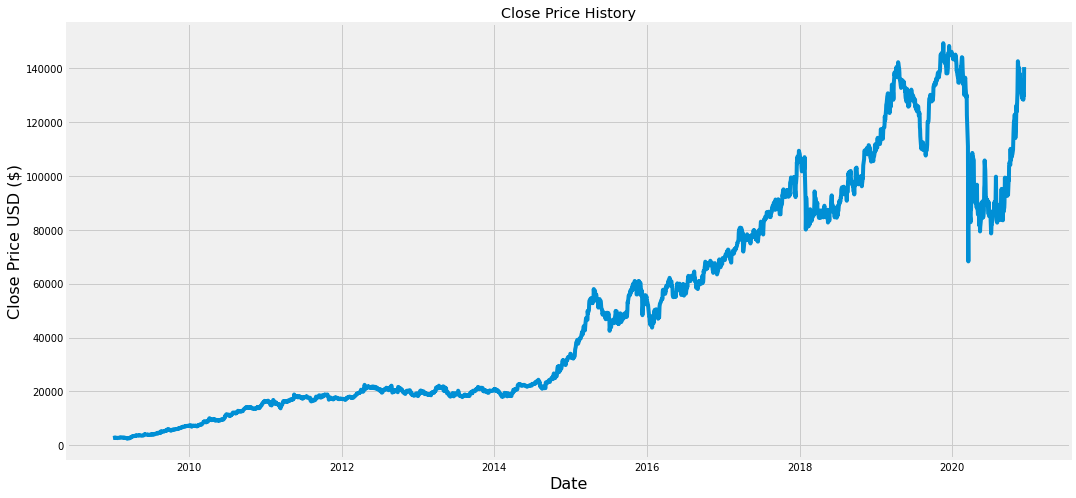

In [4]:
#visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.show()

In [5]:
#create new dataframe with only the 'Close' colomn
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2458

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0012881 ],
       [0.00132029],
       [0.00161009],
       ...,
       [0.87176947],
       [0.86768491],
       [0.93952947]])

In [7]:
#Create training dataset and scaled training dataset
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
   print(x_train)
   print(y_train)
   print()

[array([0.0012881 , 0.00132029, 0.00161009, 0.00193215, 0.00257613,
       0.00257613, 0.00254395, 0.00193215, 0.00193215, 0.00135247,
       0.00135247, 0.00193215, 0.00193215, 0.00186771, 0.00186771,
       0.00097252, 0.00141691, 0.00141691, 0.00193215, 0.00193215,
       0.00193215, 0.00193215, 0.00225414, 0.00193215, 0.00193215,
       0.00257613, 0.00322019, 0.00322019, 0.00289819, 0.00289819,
       0.00289171, 0.00257613, 0.00193215, 0.00161009, 0.00193215,
       0.00193215, 0.00161009, 0.00225414, 0.00225414, 0.00257613,
       0.00193856, 0.0012881 , 0.0012881 , 0.0012881 , 0.0012881 ,
       0.00096611, 0.00096611, 0.        , 0.00125592, 0.00080505,
       0.00064405, 0.00103048, 0.00064405, 0.00064405, 0.00090167,
       0.00038643, 0.00096611, 0.00161009, 0.00192567, 0.00321371])]
[0.0030270037088780156]



In [8]:
#convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
x_train.shape

(2398, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
2398/2398 [==============================] - 59s 24ms/step - loss: 1.2083e-04
Epoch 2/4
2398/2398 [==============================] - 57s 24ms/step - loss: 1.1186e-04
Epoch 3/4
2398/2398 [==============================] - 58s 24ms/step - loss: 1.1196e-04
Epoch 4/4
2398/2398 [==============================] - 58s 24ms/step - loss: 1.1612e-04


In [30]:
#Create testing dataset
test_data = scaled_data[training_data_len-60:, :]
#Create data sets
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [31]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [32]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
#Get the predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt((np.mean(predictions - y_test)**2))
rmse

2077.6607161034203

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


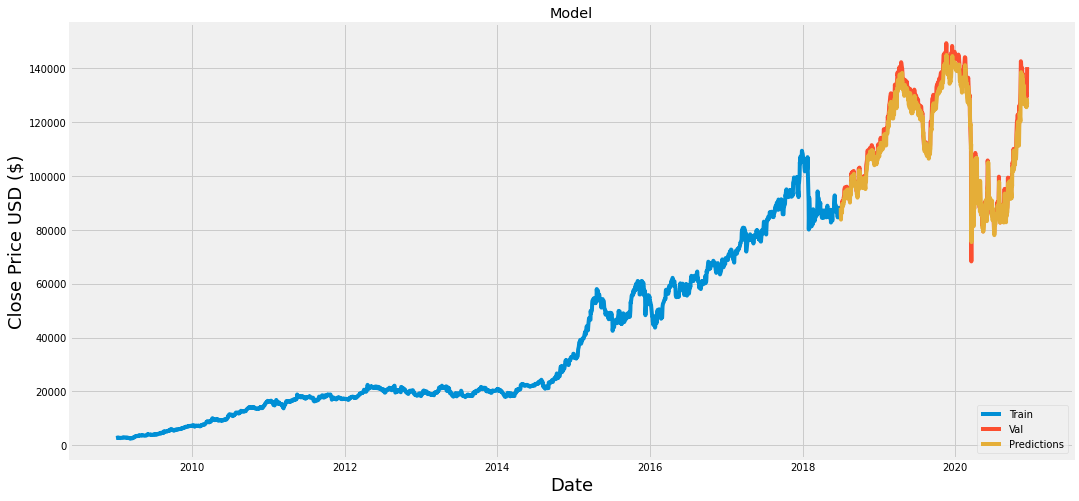

In [35]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [36]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-03,85300.0,88081.296875
2018-07-04,87375.0,83757.460938
2018-07-05,87000.0,87358.679688
2018-07-06,87000.0,86009.726562
2018-07-09,90000.0,86344.156250
...,...,...
2020-12-07,128220.0,126793.171875
2020-12-08,128555.0,125466.117188
2020-12-09,130395.0,126329.632812


This is a model that predicts stock price for Capitec Bank from 2009 to 2020.
It has a lot of shortcomings. One thing to note is that there is just too much noice in the data. It also validates the prediction for the day using the previous day. I do think the better model would've have just used the previous day instead of last 60 days but the problem with this model is that it cannot be used for long term.

When we use "buy low and sell high" we see that the best period to buy was somewhere between 2010 and 2014. Before 2010 it was still too risky but it was going to be rewarding as well.

This is not a financial advice by any means.